<a href="https://colab.research.google.com/github/naga-Prathyusha/qml-lab-tasks/blob/main/qml7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Aim: To implement and demonstrate the Deutsch-Jozsa algorithm for 2-qubit oracles,
distinguishing between constant and balanced functions using quantum computation.
1 Mathematical Model of the Deutsch-Jozsa Algorithm for 2 Qubits
Given a function f:{00,01,10,11}→{0,1} the Deutsch-Jozsa algorithm determines
whether f is constant (same output for all inputs) or balanced (outputs 0 for half the inputs, 1 for
the other half), using only one quantum query. The following key steps in the quantum state
evolution.
1. Problem Setup
You have an unknown Boolean function f:{0,1}n→{0,1} promised to be
either constant (same output for all inputs) or balanced (outputs 0 on exactly half the
inputs, and 1 on the other half).



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 97.4 MB/s eta 0:00:00
MATHEMATICAL MODEL
For function f: {00, 01, 10, 11} → {0,1}:
- Constant: f(x) = 0 or 1 for all inputs
- Balanced: f(x) = 0 for half inputs, 1 for other half

Deutsch-Jozsa Process:
1. |ψ₀⟩ = |00⟩|1⟩
2. Apply Hadamard

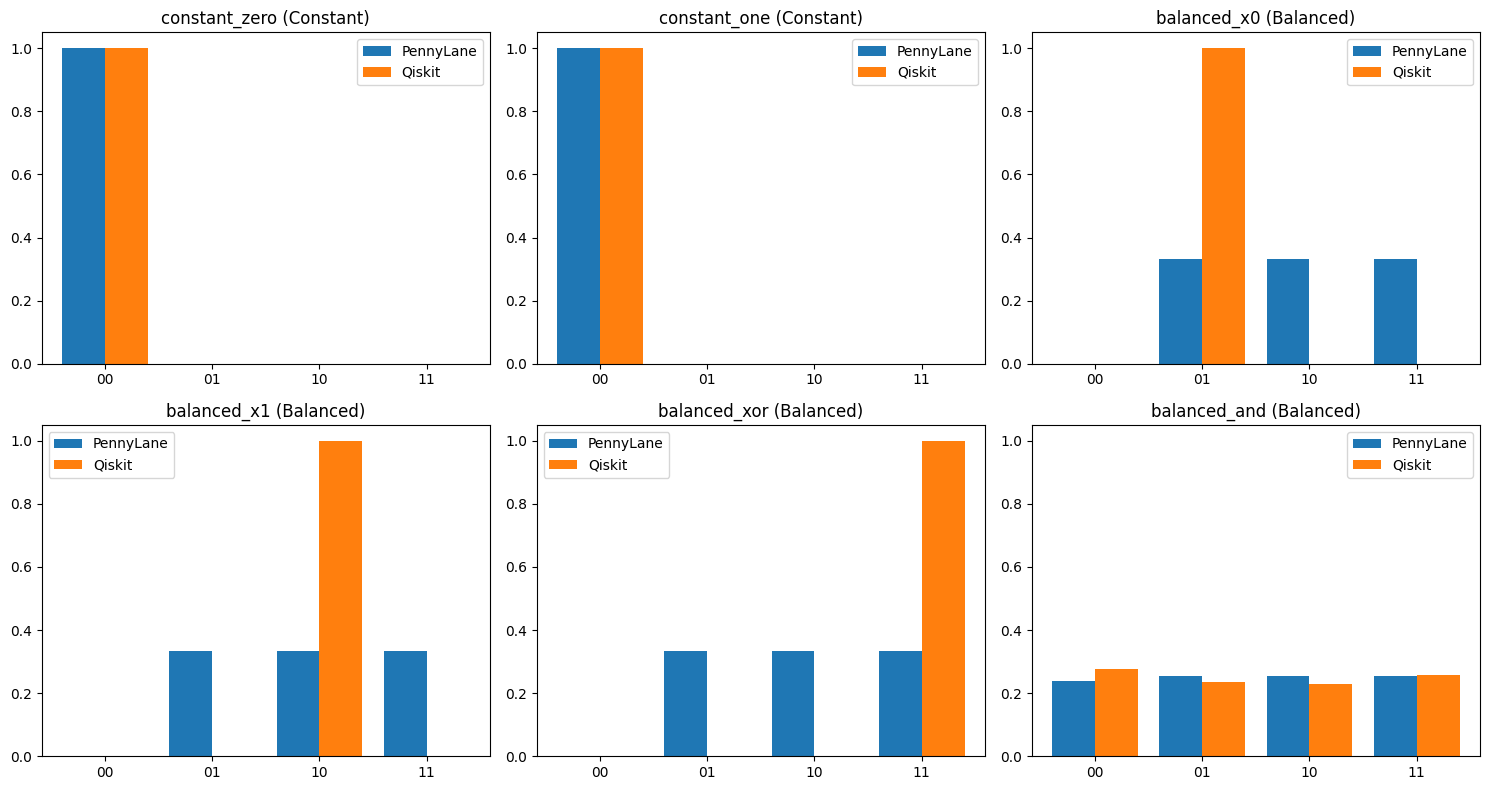


FINAL SUMMARY
Accuracy: 6/6 (100.0%)
constant_zero   → Classical=Constant, PennyLane=Constant, Qiskit=Constant
constant_one    → Classical=Constant, PennyLane=Constant, Qiskit=Constant
balanced_x0     → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced
balanced_x1     → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced
balanced_xor    → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced
balanced_and    → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced


In [ ]:
# ================= INSTALL REQUIRED PACKAGES =================
!pip install pennylane qiskit qiskit-aer matplotlib numpy --quiet
# ================= IMPORTS =================
import pennylane as qml
from pennylane import numpy as pnp
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
# ================= MATHEMATICAL MODEL (INFO) =================
print("MATHEMATICAL MODEL")
print("=" * 50)
print("For function f: {00, 01, 10, 11} → {0,1}:")
print("- Constant: f(x) = 0 or 1 for all inputs")
print("- Balanced: f(x) = 0 for half inputs, 1 for other half")
print("\nDeutsch-Jozsa Process:")
print("1. |ψ₀⟩ = |00⟩|1⟩")
print("2. Apply Hadamard → superposition")
print("3. Apply oracle U_f")
print("4. Apply Hadamard to first 2 qubits")
print("5. Measure → |00⟩ if constant, else balanced")
# ================= CLASSICAL TRUTH TABLE =================
def classical_truth_table(oracle_type):
    if oracle_type == 'constant_zero':
        return {'00': 0, '01': 0, '10': 0, '11': 0}
    elif oracle_type == 'constant_one':
        return {'00': 1, '01': 1, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x0':
        return {'00': 0, '01': 0, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x1':
        return {'00': 0, '01': 1, '10': 0, '11': 1}
    elif oracle_type == 'balanced_xor':
        return {'00': 0, '01': 1, '10': 1, '11': 0}
    elif oracle_type == 'balanced_and':
        return {'00': 0, '01': 0, '10': 0, '11': 1}

oracle_types = [
    'constant_zero', 'constant_one',
    'balanced_x0', 'balanced_x1',
    'balanced_xor', 'balanced_and'
]
# ================= PENNYLANE ORACLES =================
def constant_zero_oracle(): pass
def constant_one_oracle(): qml.PauliX(wires=2)
def balanced_x0_oracle(): qml.CNOT(wires=[0, 2])
def balanced_x1_oracle(): qml.CNOT(wires=[1, 2])
def balanced_xor_oracle():
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[1, 2])
def balanced_and_oracle(): qml.Toffoli(wires=[0, 1, 2])

pennyLane_oracles = {
    'constant_zero': constant_zero_oracle,
    'constant_one': constant_one_oracle,
    'balanced_x0': balanced_x0_oracle,
    'balanced_x1': balanced_x1_oracle,
    'balanced_xor': balanced_xor_oracle,
    'balanced_and': balanced_and_oracle
}
# ================= PENNYLANE CIRCUIT =================
dev = qml.device('default.qubit', wires=3, shots=1000)

@qml.qnode(dev)
def deutsch_jozsa_circuit(oracle_func):
    qml.PauliX(wires=2)  # set ancilla to |1>
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    oracle_func()
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.probs(wires=[0, 1])
# ================= QISKIT IMPLEMENTATION =================
def create_dj_circuit_qiskit(oracle_type):
    qc = QuantumCircuit(3, 2)
    qc.x(2)
    qc.h([0, 1, 2])
    if oracle_type == 'constant_zero': pass
    elif oracle_type == 'constant_one': qc.x(2)
    elif oracle_type == 'balanced_x0': qc.cx(0, 2)
    elif oracle_type == 'balanced_x1': qc.cx(1, 2)
    elif oracle_type == 'balanced_xor':
        qc.cx(0, 2)
        qc.cx(1, 2)
    elif oracle_type == 'balanced_and': qc.ccx(0, 1, 2)
    qc.h([0, 1])
    qc.measure(0, 0)
    qc.measure(1, 1)
    return qc

def run_qiskit_circuit(oracle_type, shots=1000):
    qc = create_dj_circuit_qiskit(oracle_type)
    sim = Aer.get_backend('qasm_simulator')
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    return result.get_counts(), qc
# ================= RUN BOTH FRAMEWORKS =================
results = []
for oracle_type in oracle_types:
    print(f"\nTesting {oracle_type}")
    print("Truth table:", classical_truth_table(oracle_type))
    # PennyLane
    probs = deutsch_jozsa_circuit(pennyLane_oracles[oracle_type])
    is_const_pl = probs[0] > 0.9
    # Qiskit
    counts, _ = run_qiskit_circuit(oracle_type)
    is_const_qk = counts.get('00', 0) / 1000 > 0.9
    results.append({
        'oracle': oracle_type,
        'classical_type': 'Constant' if all(v == list(classical_truth_table(oracle_type).values())[0] for v in classical_truth_table(oracle_type).values()) else 'Balanced',
        'pennyLane_result': 'Constant' if is_const_pl else 'Balanced',
        'qiskit_result': 'Constant' if is_const_qk else 'Balanced',
        'pennyLane_p00': probs[0],
        'qiskit_counts': counts
    })
    print(f"PennyLane → {'Constant' if is_const_pl else 'Balanced'} (P(|00>)={probs[0]:.2f})")
    print(f"Qiskit → {'Constant' if is_const_qk else 'Balanced'} (counts={counts})")
# ================= VISUALIZE RESULTS =================
states = ['00', '01', '10', '11']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, result in enumerate(results):
    pl_p00 = result['pennyLane_p00']
    pl_probs = [pl_p00, (1-pl_p00)/3, (1-pl_p00)/3, (1-pl_p00)/3]
    qk_probs = [result['qiskit_counts'].get(s, 0)/1000 for s in states]
    x = np.arange(len(states))
    axes[i].bar(x-0.2, pl_probs, 0.4, label='PennyLane')
    axes[i].bar(x+0.2, qk_probs, 0.4, label='Qiskit')
    axes[i].set_title(f"{result['oracle']} ({result['classical_type']})")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(states)
    axes[i].set_ylim(0, 1.05)
    axes[i].legend()
plt.tight_layout()
plt.show()
# ================= CONCLUSION =================
print("\nFINAL SUMMARY")
correct = sum(1 for r in results if r['pennyLane_result']==r['classical_type'] and r['qiskit_result']==r['classical_type'])
print(f"Accuracy: {correct}/{len(results)} ({100*correct/len(results):.1f}%)")
for r in results:
    print(f"{r['oracle']:15} → Classical={r['classical_type']}, PennyLane={r['pennyLane_result']}, Qiskit={r['qiskit_result']}")


In [ ]:
Result
The Deutsch-Jozsa algorithm successfully proves that quantum computers can solve certain
problems with exponential speedup over classical approaches, using the fundamental quantum
principles of superposition and interference.